# Lesson 1.4
---
## Video 2
---
### basics of markdown
I really like using Markdown. \
I just love **bold text**. \
Italicized text is the *cat's meow*.
> Dorothy followed her through many of the beautiful rooms in her castle.
- Списочки
- Разные
    - И даже многослойные, как огры \*(\`~\`)\*

а вот и `код` \
My favorite search engine is [Duck Duck Go](https://duckduckgo.com). \
This information is provided by [This amaizing website](https://www.markdownguide.org/basic-syntax)

Импортируем модули

In [3]:
import pandas as pd
import numpy as np

In [4]:
student_performance = pd.read_csv("Dataframes\StudentsPerformance.csv")

In [3]:
student_performance

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
student_performance.abs

<bound method NDFrame.abs of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none       

In [5]:
student_performance.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

## Video 3
---
Отбираем нужные колонки и строки из нашей таблицы 
### 1 Способ
**iloc** - индексы строк и индексы столбцов (не включая последний) \
-1 - последняя с конца, как и в Python \
: - значит все строки / столбцы

In [10]:
student_performance.iloc[0:3, 0:5]

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none


In [13]:
student_performance.iloc[[0, 3, 10], [5, -2, -1]]

,math score,reading score,writing score
0,72,72,74
3,47,57,44
10,58,54,52


Dataframes и отсутствие столбцов = **печатаются строки**

In [14]:
student_performance_with_names = student_performance.iloc[[0, 3, 4, 7, 8]]

In [15]:
student_performance_with_names

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67


Зададим наши индексы

In [16]:
student_performance_with_names.index = ["Jane", "Mike", "Gregor", "Joffrey", "Leo"]

In [17]:
student_performance_with_names

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
Jane,female,group B,bachelor's degree,standard,none,72,72,74
Mike,male,group A,associate's degree,free/reduced,none,47,57,44
Gregor,male,group C,some college,standard,none,76,78,75
Joffrey,male,group B,some college,free/reduced,none,40,43,39
Leo,male,group D,high school,free/reduced,completed,64,64,67


### 2 Способ
**loc** - тоже отбирает забиси таблицы, но по лейблам (включая последний)

In [19]:
student_performance_with_names.loc[["Jane", "Gregor"], ["gender"]]

,gender
Jane,female
Gregor,male


In [22]:
type(student_performance_with_names.loc[["Jane", "Gregor"], ["gender"]])

pandas.core.frame.DataFrame

## Video 4
---
Каждая табличка (Dataframe) - это объединенные в одном месте серии (Series).
Каждая колонка - это пандовская серия.

In [20]:
student_performance_with_names.iloc[:, 0]

Jane       female
Mike         male
Gregor       male
Joffrey      male
Leo          male
Name: gender, dtype: object

In [21]:
type(student_performance_with_names.iloc[:, 0])

pandas.core.series.Series

In [24]:
pd.Series([1, 2, 3], index = ["Jane", "Mike", "Gregor"])

Jane      1
Mike      2
Gregor    3
dtype: int64

In [31]:
my_series_1 = pd.Series([1, 2, 3], index = ["Jane", "Mike", "Gregor"])
my_series_2 = pd.Series([4, 5, 6], index = ["Jane", "Mik", "Gregor"])

Делаем свою таблицу из своих серий

In [29]:
pd.DataFrame({"col_name_1":my_series_1, "col_name_2":my_series_2})

,col_name_1,col_name_2
Gregor,3.0,6.0
Jane,1.0,4.0
Mik,NaN,5.0
Mike,2.0,NaN


In [32]:
student_performance_with_names["gender"]

Jane       female
Mike         male
Gregor       male
Joffrey      male
Leo          male
Name: gender, dtype: object

In [33]:
student_performance_with_names[["gender"]]

,gender
Jane,female
Mike,male
Gregor,male
Joffrey,male
Leo,male


In [34]:
student_performance_with_names["gender"].shape

(5,)

In [35]:
student_performance_with_names[["gender"]].shape

(5, 1)

### Exeercises

In [42]:
student_performance.iloc[:7]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


7 первых строк датафрейма
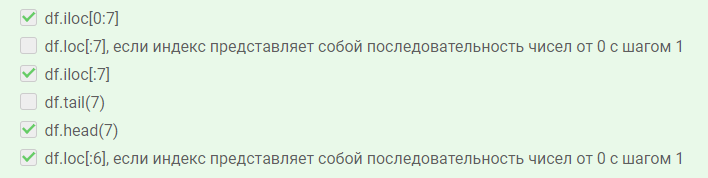

In [43]:
student_performance.index

RangeIndex(start=0, stop=1000, step=1)

In [44]:
student_performance.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [49]:
student_performance.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [50]:
student_performance.size

8000

In [51]:
student_performance.shape

(1000, 8)

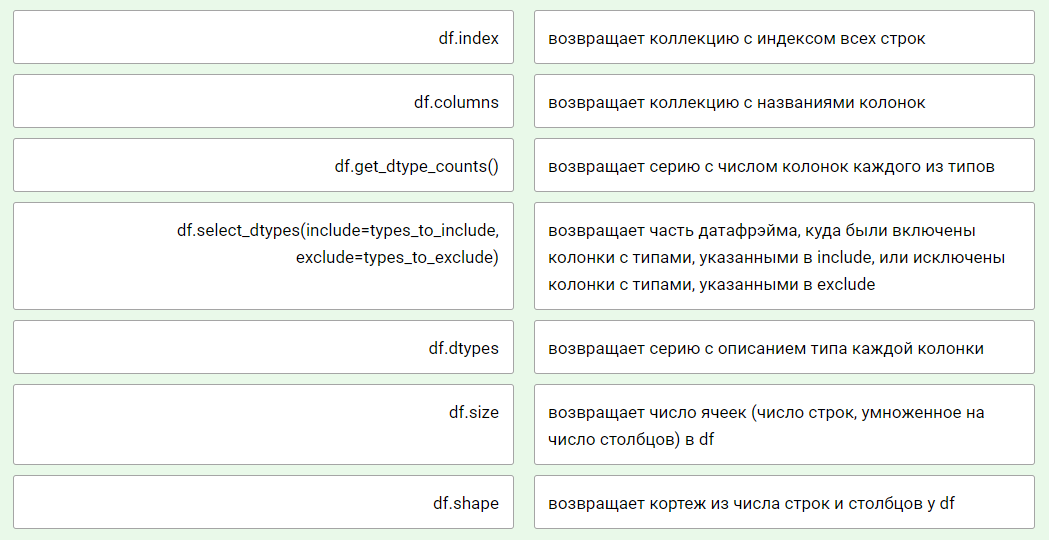

In [53]:
titanic = pd.read_csv("Dataframes\titanic.csv")

In [54]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [55]:
titanic.shape

(891, 12)

In [56]:
titanic.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [ ]:
titanic.dtypes